In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#가상 데이터 만들기(키와 나이)
np.random.seed(seed=1)
X_min=4
X_max=30
X_n=16
X=5+25*np.random.rand(X_n)
Prm_c=[170,108,0.2]
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.rand(X_n)
np.savez('ch5_data.npz',X=X,X_min=X_min,X_max=X_max,X_n=X_n,T=T)

In [4]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [5]:
print(np.round(X,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [6]:
print(np.round(T,2))

[166.73 171.15 130.85 162.03 154.13 148.83 155.6  165.71 168.04 170.89
 165.46 168.86 156.38 173.02 135.75 170.29]


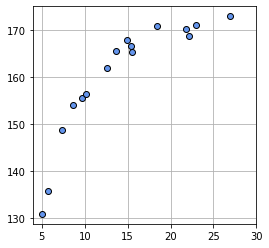

In [7]:
# 가상 데이터 그래프
plt.figure(figsize=(4,4))
plt.plot(X,T,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

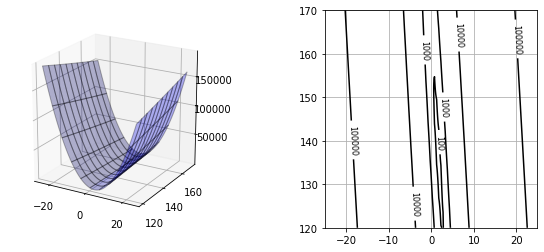

In [8]:
#5-1-6 3차원 cost function
from mpl_toolkits.mplot3d import Axes3D
def mse_line(x,t,w):
    y=w[0]*x+w[1]# hypothesis 
    mse=np.mean((y-t)**2)
    return mse
xn=100
w0_range=[-25,25] 
w1_range=[120,170]
x0 = np.linspace(w0_range[0],w0_range[1],xn)
x1 = np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1=np.meshgrid(x0,x1)
J=np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0]=mse_line(X,T,(x0[i0],x1[i1]))
        
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,J,rstride=10,cstride=10,alpha=0.3,color='blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont=plt.contour(xx0,xx1,J,30,colors='black',levels=[100,1000,10000,100000])

cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
plt.show()

In [72]:
#5-1-7
def dmse_line(x,t,w):
    y=w[0]*x+w[1]
    d_w0=2*np.mean((y-t)*x)
    d_w1=2*np.mean(y-t)
    return d_w0,d_w1

#5-1-8
d_w=dmse_line(X,T,[10,165])
print(np.round(d_w,1))

[4983.1  298. ]


반복횟수 13778
W=[1.643644,136.576055]
dMSE=[-0.005793,0.099986]
MSE=36.823423


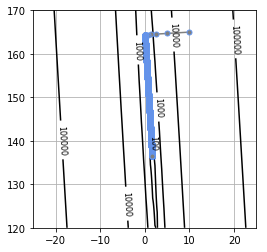

In [73]:
#5-1-9
def fit_line_num(x,t):
    w_init=[10.0,165.0]
    alpha=0.001
    i_max=100000
    eps=0.1
    w_i=np.zeros([i_max,2])
    w_i[0,:]=w_init
    for i in range(1,i_max):
        dmse=dmse_line(x,t,w_i[i-1])
        w_i[i,0]=w_i[i-1,0]-alpha*dmse[0]
        w_i[i,1]=w_i[i-1,1]-alpha*dmse[1]
        if max(np.absolute(dmse))<eps:
            break
            
    w0=w_i[i,0]
    w1=w_i[i,1]
    w_i=w_i[:i,:]
    return w0,w1,dmse,w_i

plt.figure(figsize=(4,4))
xn=100
w0_range=[-25,25] 
w1_range=[120,170]
x0 = np.linspace(w0_range[0],w0_range[1],xn)
x1 = np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1=np.meshgrid(x0,x1)
J=np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0]=mse_line(X,T,(x0[i0],x1[i1]))
cont=plt.contour(xx0,xx1,J,30,colors='black',levels=[100,1000,10000,100000])

cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)

#경사하강법 호출
W0,W1,dMSE,W_history=fit_line_num(X,T)

# 결과 보기
print("반복횟수 {0}".format(W_history.shape[0]))
print('W=[{0:.6f},{1:.6f}]'.format(W0,W1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:,0],W_history[:,1],'.-',markersize='10',markeredgecolor='cornflowerblue',color='gray')
plt.show()

w0=1.644,w1=136.576
SD=6.068cm


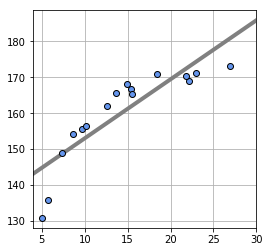

In [74]:
#5-1-10
def show_line(w):
    xb=np.linspace(X_min,X_max,100)
    y=w[0]*xb+w[1]
    plt.plot(xb,y,color=(.5,.5,.5),linewidth=4)
    
plt.figure(figsize=(4,4))
W=np.array([W0,W1])
mse=mse_line(X,T,W)
print('w0={0:.3f},w1={1:.3f}'.format(W0,W1))
print('SD={0:.3f}cm'.format(np.sqrt(mse)))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

In [76]:
#5-1-11
def fit_line(x,t):
    mx=np.mean(x)
    mt=np.mean(t)
    mtx=np.mean(t*x)
    mxx=np.mean(x*x)
    w0=(mtx-mt*mx)/(mxx-mx**2)
    w1=mt-w0*mx
    return np.array([w0,w1])




In [79]:
W=fit_line(X,T)
print("w0={0:.3f},w1 ={1:.3f}".format(W[0],W[1]))
mse=mse_line(X,T,W)
print('SD={0:.3f}cm'.format(np.sqrt(mse)))
                                       


w0=1.661,w1 =136.272
SD=6.067cm


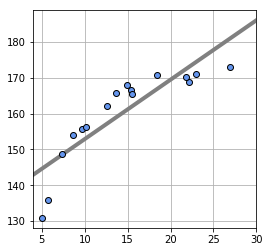

In [81]:
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()